In [1]:
!pip install --user --upgrade apafib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install -U yellowbrick


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from apafib import load_MITBIH
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score, \
                    balanced_accuracy_score, confusion_matrix, make_scorer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression


from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

In [2]:
df = load_MITBIH()

X = df.drop(columns = ['target'])
y = df[['target']]

df.head()


,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,target
0,0.988684,0.225644,0.005137,0.067679,0.045216,0.052735,0.078290,0.078020,0.106516,0.131787,...,-0.000027,0.000037,-0.000035,0.000024,-0.000009,-0.000004,0.000013,-0.000017,1.493154e-05,Normal
1,0.988463,0.255621,0.014753,0.135870,0.149761,0.145114,0.260982,0.331085,0.323523,0.311399,...,-0.000062,0.000172,-0.000210,0.000184,-0.000115,0.000032,0.000040,-0.000084,9.528151e-05,ArrS
2,0.975710,0.541291,0.056431,0.001236,0.046895,0.023730,0.047825,0.033864,0.042665,0.038015,...,-0.000408,-0.000067,0.000417,-0.000612,0.000628,-0.000479,0.000233,0.000025,-2.191219e-04,ArrS
3,0.988539,0.640719,0.211277,0.153709,0.143665,0.113944,0.136569,0.111482,0.123713,0.099498,...,-0.000011,0.000007,-0.000002,-0.000002,0.000005,-0.000006,0.000005,-0.000003,5.437810e-07,Normal
4,0.718637,0.413863,0.123311,0.058860,0.055222,0.043426,0.060662,0.056730,0.079994,0.107037,...,0.000003,-0.000017,0.000023,-0.000021,0.000015,-0.000006,-0.000003,0.000008,-1.048218e-05,Normal


In [3]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
90        0
91        0
92        0
93        0
target    0
Length: 95, dtype: int64

In [4]:
sum(df.isna().sum())

0

In [5]:
clases = df['target'].unique()
print(clases)

['Normal' 'ArrS' 'ArrQ' 'ArrV' 'ArrF']


# Apartado A

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

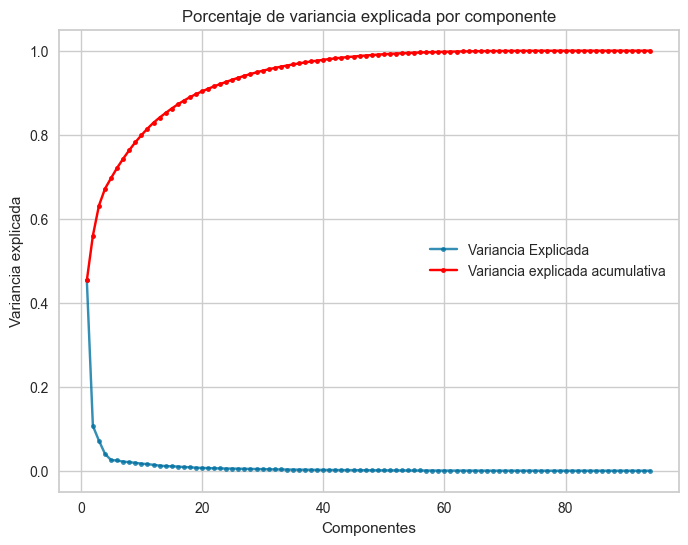

In [7]:
pca = PCA().fit(X_train);
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

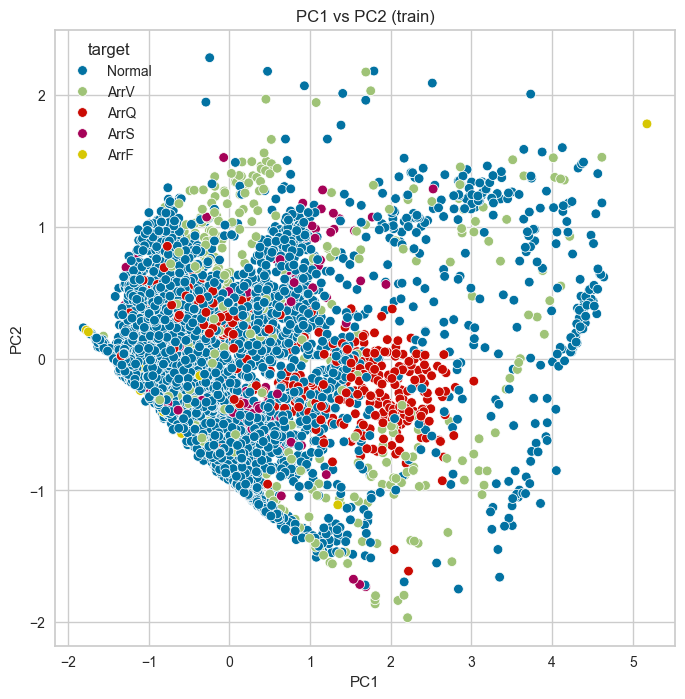

In [8]:
X_trans = pca.transform(X_train)

plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:, 0], y=X_trans[:, 1], hue=y_train.iloc[:, 0])
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PC1 vs PC2 (train)')
plt.legend(title='target')
plt.show()



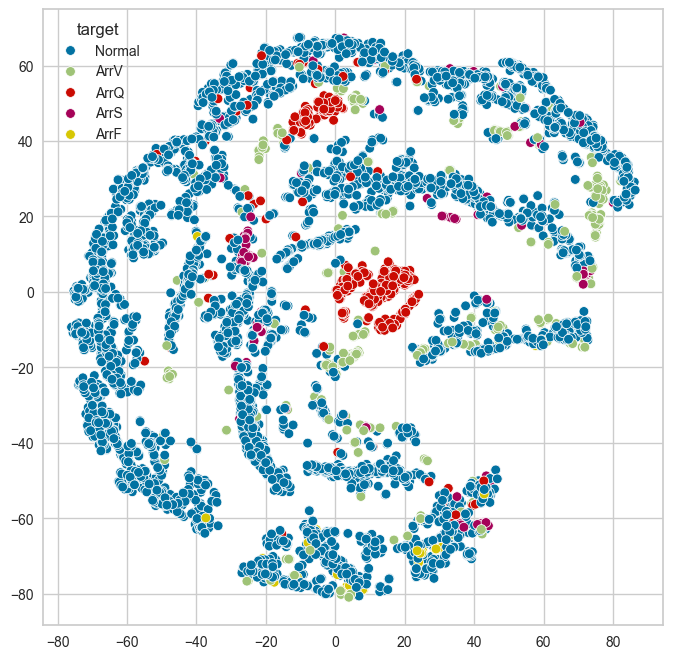

In [9]:
X_trans = TSNE(n_components=2, perplexity=40, max_iter=2000, init='pca').fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train.iloc[:, 0]);

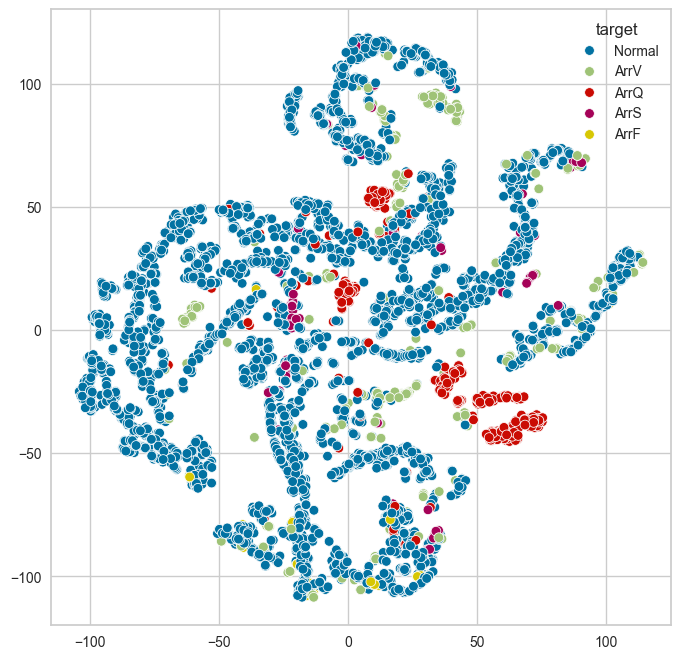

In [10]:
X_trans = TSNE(n_components=2, perplexity=20, max_iter=2000, init='pca').fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train.iloc[:, 0]);

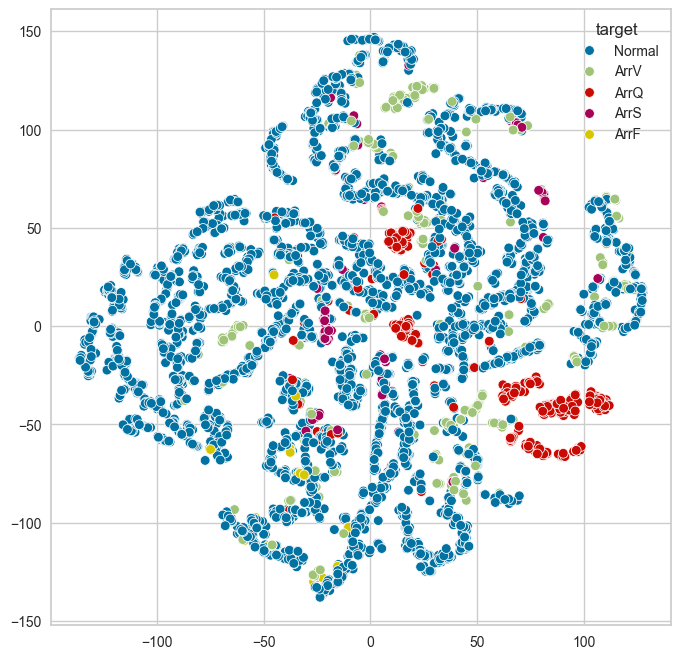

In [11]:
X_trans = TSNE(n_components=2, perplexity=10, max_iter=2000, init='pca').fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train.iloc[:, 0]);

# Apartado B


In [12]:
def save_results(clf, X_test, y_test, nclf, df):
    if hasattr(clf, 'best_score_'):
        df.loc[nclf,'train XV acc'] = clf.best_score_
    else:
        df.loc[nclf,'train XV acc'] = np.nan
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (M)'] = precision_score(y_test, clf.predict(X_test), average='macro')
    df.loc[nclf,'recall score (M)'] = recall_score(y_test, clf.predict(X_test), average='macro')
    df.loc[nclf,'f1 score (M)'] = f1_score(y_test, clf.predict(X_test), average='macro')
    return df

results_df = pd.DataFrame()

In [13]:
bnb = BernoulliNB()
print(np.mean(cross_val_score(bnb,X_train,np.ravel(y_train),cv=10)))

0.602387915646749


In [14]:
bnb_model = BernoulliNB().fit(X_train, y_train)

bnb_model.best_score_ = np.mean(cross_val_score(bnb_model,X_train,np.ravel(y_train),cv=10))

C:\Users\34656\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
cls = [str(v) for v in sorted(df['target'].unique())]

In [16]:
print(classification_report(np.ravel(y_test), bnb_model.predict(X_test), target_names=cls))
results_df = save_results(bnb_model, X_test, np.ravel(y_test), 'BNB (b)', results_df)

              precision    recall  f1-score   support

        ArrF       0.04      0.55      0.08        20
        ArrQ       0.26      0.76      0.39       208
        ArrS       0.00      0.00      0.00        67
        ArrV       0.14      0.24      0.18       198
      Normal       0.89      0.62      0.73      2397

    accuracy                           0.59      2890
   macro avg       0.27      0.44      0.28      2890
weighted avg       0.77      0.59      0.65      2890



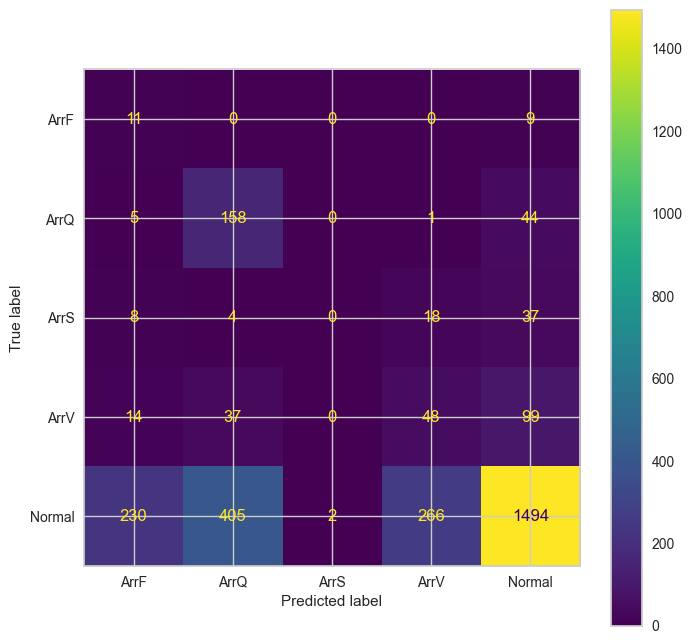

In [17]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(bnb_model, X_test,np.ravel(y_test), display_labels=cls, ax=plt.subplot());

C:\Users\34656\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


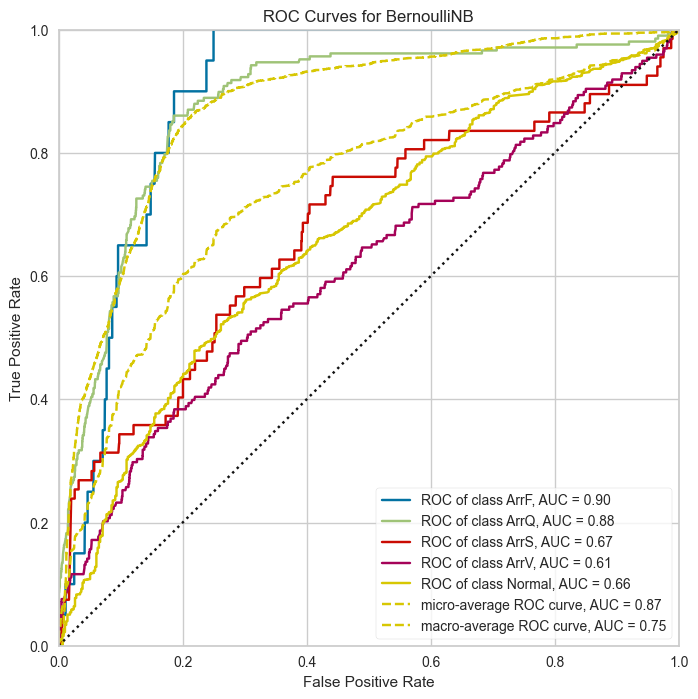

In [18]:
plt.figure(figsize=(8,8));
roc_auc(bnb_model, X_train, np.ravel(y_train), X_test, np.ravel(y_test), classes=cls);

# Apartado C

## Modelo discriminante lineal

In [19]:
lda = LinearDiscriminantAnalysis()
lda.best_score_ = np.mean(cross_val_score(lda,X_train,np.ravel(y_train),cv=10))
print(lda.best_score_)

0.8714429824816415


Obtenemos un buen acierto del modelo, pero intentaremos mejorarlo un poco ajustando algun hiper parámetro

In [20]:
param_grid = [
    {
        'solver': ['lsqr', 'eigen'], # Probamos diferentes algoritmos
        'shrinkage': [None, 'auto'],  # Intentamos reducir overfitting con regularización
        'n_components': [None, 1, 2, 3, 4],  # hasta 4 componentes al tener 5 classes
    },
    {
        'solver': ['svd'], 'n_components': [None, 1, 2, 3, 4] #Para svd no podemos utilizar shrinkage
    }
]
lda = LinearDiscriminantAnalysis()
grid = GridSearchCV(lda, param_grid, cv=10)
grid.fit(X_train, np.ravel(y_train))

print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.8714429824816415
Best parameters: {'n_components': None, 'shrinkage': None, 'solver': 'lsqr'}


Despues de probar ajustar los hiper parámetro, vemos que el modelo inicial sin ajustar es igual de bueno. Por lo que procedemos entrenar el modelo inicial los datos train y despues los test.

In [21]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, np.ravel(y_train))

print('Priors:', lda_model.priors_)
print('Intercepts:')
intercepts = pd.DataFrame(lda_model.intercept_)
print(intercepts)

print('Explained Variance Ratio')
print(pd.DataFrame(lda_model.explained_variance_ratio_ ))


Priors: [0.00682012 0.07178176 0.0230179  0.0687127  0.82966752]
Intercepts:
           0
0  -4.435815
1 -20.805087
2  -8.465001
3   0.175265
4  -0.236979
Explained Variance Ratio
          0
0  0.795390
1  0.107481
2  0.071478
3  0.025650


Observamos gracias a los prior que una clase (la última) representa aproximadamente el 83% de los datos, mientras que las otras son mucho menos frecuentes. Esto puede afectar al modelo. Además vemos como la componente discriminante 1 explica casi el 80% de la variancia. Ahora aplicamos a los datos test

In [22]:
print(classification_report(np.ravel(y_test), lda_model.predict(X_test), target_names = ['ArrF', 'ArrQ', 'ArrS', 'ArrV', 'Normal']))
results_df = save_results(lda_model, X_test, np.ravel(y_test), 'LDA', results_df)

              precision    recall  f1-score   support

        ArrF       0.11      0.35      0.17        20
        ArrQ       0.93      0.87      0.90       208
        ArrS       0.41      0.36      0.38        67
        ArrV       0.41      0.37      0.39       198
      Normal       0.93      0.93      0.93      2397

    accuracy                           0.87      2890
   macro avg       0.56      0.58      0.56      2890
weighted avg       0.88      0.87      0.88      2890



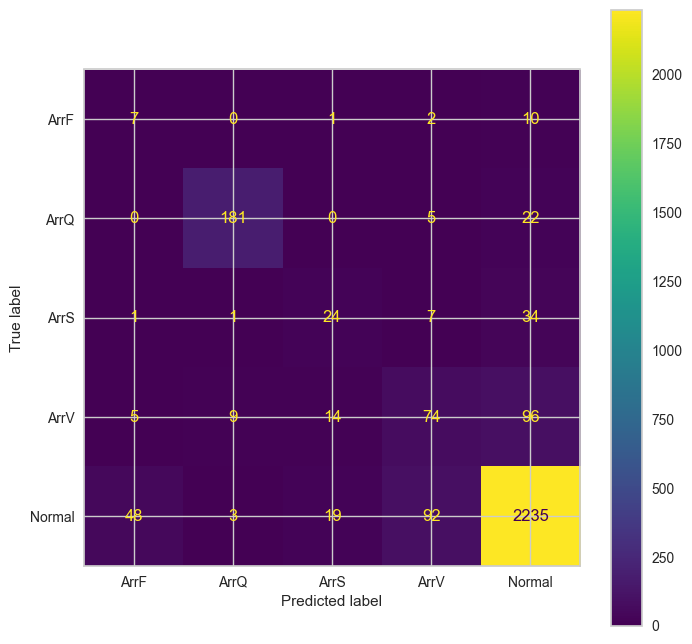

In [23]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lda_model, X_test,np.ravel(y_test), display_labels=['ArrF', 'ArrQ', 'ArrS', 'ArrV', 'Normal'], ax=plt.subplot());

C:\Users\34656\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


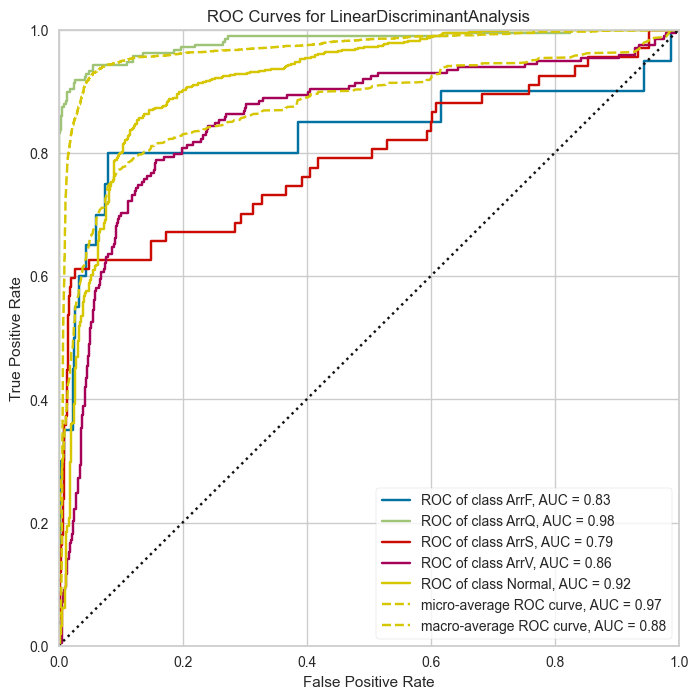

In [24]:
plt.figure(figsize=(8,8));
roc_auc(lda_model, X_train, np.ravel(y_train), X_test, np.ravel(y_test), classes=cls);

En general, el modelo tiene buen rendimiento, con una precisión global del 87%. Pero si miramos más de cerca, vemos que la clase "Normal" domina el conjunto de datos y eso hace que el modelo se enfoque mucho en ella. Por ejemplo, tiene más de 2300 muestras, mientras que clases como "ArrF" solo tienen 20. Esto provoca que el modelo identifique muy bien la clase "Normal" y "ArrQ", pero le cuesta bastante con las demás. Las clases minoritarias como "ArrF", "ArrS" y "ArrV" tienen f1-scores bajos, lo que indica que no las está clasificando bien. Aunque el accuracy parece alto, el promedio macro muestra que el rendimiento real en todas las clases es bastante más bajo.

## Modelo regresión logística con penalización L2

A continuación aplicamos regresión logística con penalización L2 y ajustando hiper parámetros

In [25]:
lr= LogisticRegression(max_iter=10000)
param = {'penalty':['l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train,  np.ravel(y_train));

In [26]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
18,"{'C': 251.18864315095772, 'penalty': 'l2'}",0.902471,1
14,"{'C': 15.848931924611142, 'penalty': 'l2'}",0.901960,2
19,"{'C': 501.18723362727246, 'penalty': 'l2'}",0.901959,3
17,"{'C': 125.89254117941663, 'penalty': 'l2'}",0.901620,4
16,"{'C': 63.0957344480193, 'penalty': 'l2'}",0.901278,5


Podemos observar como tenemos muy buenos resultados, y elegimos obviamente el mejor de los modelos con combinaciones de hyper parámetros difrentes. Ahora observamos los resultado con los dato test

In [27]:
print(classification_report(np.ravel(y_test), lr_gs.predict(X_test), target_names = ['ArrF', 'ArrQ', 'ArrS', 'ArrV', 'Normal']))
results_df = save_results(lr_gs, X_test, np.ravel(y_test), 'Logistic', results_df)

              precision    recall  f1-score   support

        ArrF       0.50      0.25      0.33        20
        ArrQ       0.91      0.90      0.91       208
        ArrS       0.61      0.42      0.50        67
        ArrV       0.52      0.23      0.32       198
      Normal       0.92      0.98      0.95      2397

    accuracy                           0.90      2890
   macro avg       0.69      0.56      0.60      2890
weighted avg       0.88      0.90      0.89      2890



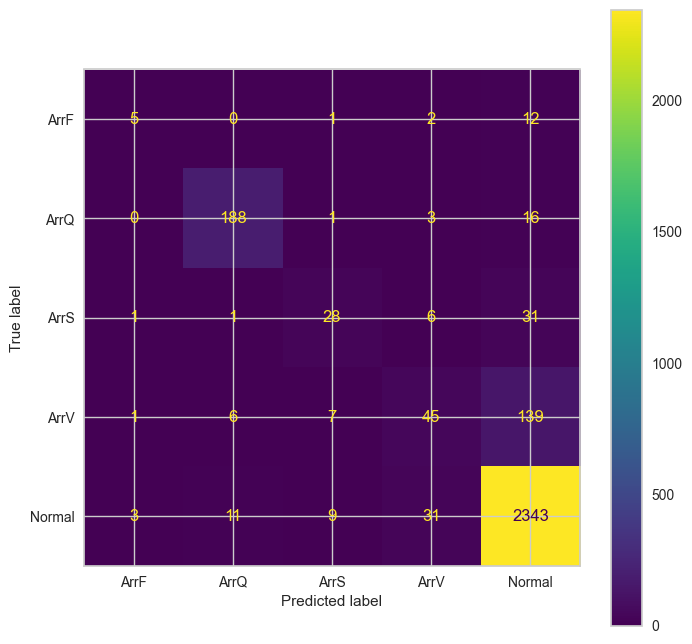

In [28]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test,np.ravel(y_test), display_labels=['ArrF', 'ArrQ', 'ArrS', 'ArrV', 'Normal'], ax=plt.subplot());

C:\Users\34656\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


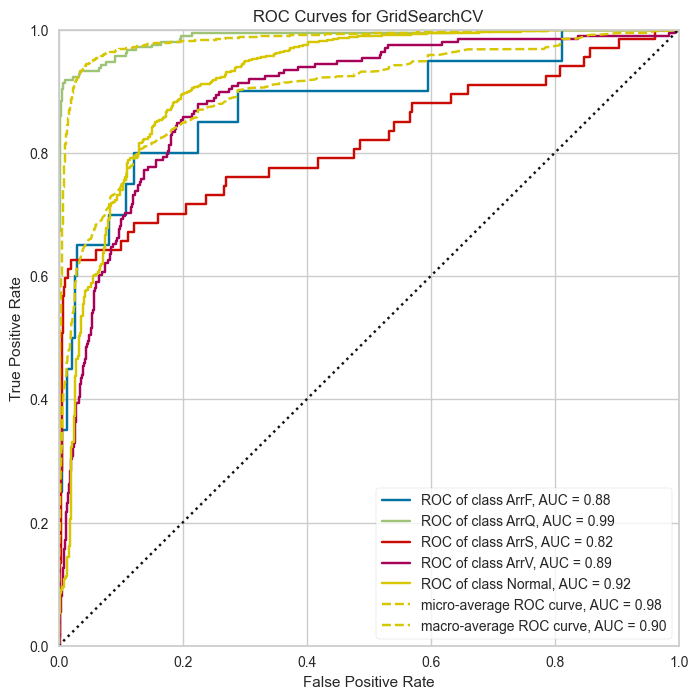

In [29]:
plt.figure(figsize=(8,8));
roc_auc(lr_gs, X_train, np.ravel(y_train), X_test, np.ravel(y_test), classes=cls);

La regresión lineal con penalización L2 mostró un rendimiento solido en general, mucho mejor que LDA. Aunque la clase "Normal" sigue siendo la más fácil de detectar, el modelo logró mejorar la detección de clases minoritarias como "ArrF", "ArrS" y "ArrV" en comparación con LDA. El f1-score promedio también subió, lo que indica que el modelo es más equilibrado y menos desbalanceado hacia la clase dominante. En resumen, la regresión lineal parece adaptarse mejor al desbalance del dataset y ofrece una clasificación más justa entre clases.

# Apartado D

## Modelo regresión logística con class_weight = "balanced"

In [38]:
#Distribución de clases
arr_classes = ['ArrS','ArrQ','ArrV','ArrF']
all_classes = ['Normal'] + arr_classes

print("Distribución de clases en train:")
print(y_train.value_counts(normalize=True).rename("ratio").mul(100).round(2).astype(str) + "%")
print("\nDistribución de clases en test:")
print(y_test.value_counts(normalize=True).rename("ratio").mul(100).round(2).astype(str) + "%")

Distribución de clases en train:
target
Normal    82.97%
ArrQ       7.18%
ArrV       6.87%
ArrS        2.3%
ArrF       0.68%
Name: ratio, dtype: object

Distribución de clases en test:
target
Normal    82.94%
ArrQ        7.2%
ArrV       6.85%
ArrS       2.32%
ArrF       0.69%
Name: ratio, dtype: object


Podemos observar en este punto cómo de desbalanceado está el conjunto. Vemos que la clase Normal domina (aprox 83%) y que ArrF y ArrS son muy minoritarias (0.7% y 2.3%).

In [32]:
def evaluate_and_report(model, X_tr, y_tr, X_te, y_te, title=""):
    y_pred_tr = model.predict(X_tr)
    y_pred_te = model.predict(X_te)

    metrics = {}
    metrics["acc_test"] = accuracy_score(y_te, y_pred_te)
    metrics["bal_acc_test"] = balanced_accuracy_score(y_te, y_pred_te)
    metrics["f1_macro_test"] = f1_score(y_te, y_pred_te, average='macro')
    metrics["f1_weighted_test"] = f1_score(y_te, y_pred_te, average='weighted')

    y_te_arr_mask = y_te.isin(arr_classes)
    y_pred_te_arr = y_pred_te[y_te_arr_mask]
    y_te_arr = y_te[y_te_arr_mask]

    if len(y_te_arr) > 0:
        metrics["recall_macro_arrhythmias_test"] = recall_score(y_te_arr, y_pred_te_arr, average='macro', labels=arr_classes)
        metrics["f1_macro_arrhythmias_test"] = f1_score(y_te_arr, y_pred_te_arr, average='macro', labels=arr_classes)

    print(f"\n=== {title} ===")
    print("Métricas de test:")
    for k, v in metrics.items():
        print(f"- {k}: {v:.4f}")

    print("\nClassification report (test):")
    print(classification_report(y_te, y_pred_te, labels=all_classes, zero_division=0))

    cm = confusion_matrix(y_te, y_pred_te, labels=all_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_classes)
    fig, ax = plt.subplots(figsize=(7,6))
    disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
    ax.set_title(f"Confusion Matrix - {title}")
    plt.show()

    return metrics

Mejor C (class_weight='balanced'): {'C': np.float64(100.0)}
Mejor f1_macro CV: 0.46666907239515226

=== LogReg (balanced) ===
Métricas de test:
- acc_test: 0.6889
- bal_acc_test: 0.7197
- f1_macro_test: 0.4745
- f1_weighted_test: 0.7498
- recall_macro_arrhythmias_test: 0.7330
- f1_macro_arrhythmias_test: 0.7431

Classification report (test):
              precision    recall  f1-score   support

      Normal       0.97      0.67      0.79      2397
        ArrS       0.14      0.69      0.23        67
        ArrQ       0.70      0.92      0.80       208
        ArrV       0.31      0.72      0.44       198
        ArrF       0.06      0.60      0.11        20

    accuracy                           0.69      2890
   macro avg       0.44      0.72      0.47      2890
weighted avg       0.88      0.69      0.75      2890



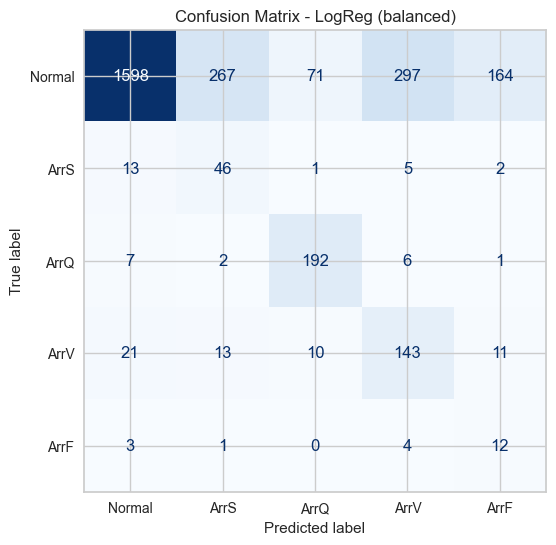

In [37]:
logreg_bal = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=2000, n_jobs=-1)

param_grid = {"C": np.logspace(-3, 2, 11)}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs_bal = GridSearchCV(estimator=logreg_bal, param_grid=param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, refit=True, verbose=0)

y_train_s = y_train.iloc[:,0]
y_test_s = y_test.iloc[:,0]

gs_bal.fit(X_train, y_train_s)

print("Mejor C (class_weight='balanced'):", gs_bal.best_params_)
print("Mejor f1_macro CV:", gs_bal.best_score_)

metrics_bal = evaluate_and_report(gs_bal.best_estimator_, X_train, y_train_s, X_test, y_test_s, title="LogReg (balanced)")

Introducimos el parámetro class_weight="balanced" como se nos pide. Esta modificación respecto al apartado anterior hará que la regresión logística L2 penalice más  los errores en clases raras y reduce el peso de los aciertos triciales en la clase mayoritaria. 
El accuracy cae, siendo ahora de un 0.69. Esto es adecuado, ya que dejamos de priorizar tanto la clase Normal.
Ahora balanced accuracy es mejor indicador (0.72), ya que promedia recalls por clase y muestra que las clases pequeñas ahora si reciben atención.
En la Confusion Matrix se puede ver como ha habido un cambio respecto al apartado anterior. Ahora el modelo tiene en cuenta cosas que antes se perdían:

ArrV: pasa de 45 a 143 verdaderos positivos (recall sube de 0.23 a 0.72, +49 puntos).

ArrS: de 28 a 46 (recall 0.42 → 0.69, +27 puntos).

ArrF: de 5 a 12 (recall 0.25 → 0.60, +35 puntos).

ArrQ: ya era buena (0.90) y mejora ligeramente (0.92).

En conclusión, al introducir la variable "balanced" la regresión logística L2 pasa de ser un modelo con alta accuracy pero baja la sensibilidad en arritmias raras a uno con un incremento notable del recall en todas las arritmias (sobre todo en ArrV, ArrS y ArrF). Esta mejora se debe al haber sacrificado la precisión y reducir la accuracy global, generando más falsos positivos sobre la clase Normal.

## Exploración de pesos manuales por clases

Partiendo del modelo anterior con class_weight="balanced", queremos encontrar una asignación manual de pesos que:

1. Mantenga o aumente el recall de las arritmias
2. Mejore la precisión de las arritmias más castigadas bajo el esquema balanceado
3. No hunda completamente la clasificación Normal

In [46]:
candidates = [
    {'Normal':0.40, 'ArrS':1.8, 'ArrQ':1.0, 'ArrV':1.5, 'ArrF':2.2},
    {'Normal':0.30, 'ArrS':2.2, 'ArrQ':1.0, 'ArrV':1.6, 'ArrF':2.7},
    {'Normal':0.25, 'ArrS':2.5, 'ArrQ':1.0, 'ArrV':1.8, 'ArrF':3.0},
    {'Normal':0.40, 'ArrS':2.0, 'ArrQ':1.0, 'ArrV':1.5, 'ArrF':2.4}
]

cv_scores = []
for w in candidates:
    m = LogisticRegression(penalty='l2', solver='lbfgs', class_weight=w, C=100, max_iter=3000, n_jobs=-1)
    score = cross_val_score(m, X_train, y_train_s, cv=5, scoring='f1_macro', n_jobs=-1).mean()
    cv_scores.append(score)
best_idx = int(np.argmax(cv_scores))
best_w = candidates[best_idx]
print("Mejores pesos (según f1_macro CV):", best_w, " | f1_macro CV:", cv_scores[best_idx])

Mejores pesos (según f1_macro CV): {'Normal': 0.4, 'ArrS': 1.8, 'ArrQ': 1.0, 'ArrV': 1.5, 'ArrF': 2.2}  | f1_macro CV: 0.6418448492579892


balanced_acc: 0.6506950934751543
f1_macro   : 0.6144155685724307
f1_weighted: 0.8813512657841197

Classification report (pesos manuales):

              precision    recall  f1-score   support

        ArrF      0.200     0.300     0.240        20
        ArrQ      0.896     0.913     0.905       208
        ArrS      0.500     0.552     0.525        67
        ArrV      0.401     0.581     0.474       198
      Normal      0.951     0.907     0.928      2397

    accuracy                          0.873      2890
   macro avg      0.590     0.651     0.614      2890
weighted avg      0.893     0.873     0.881      2890



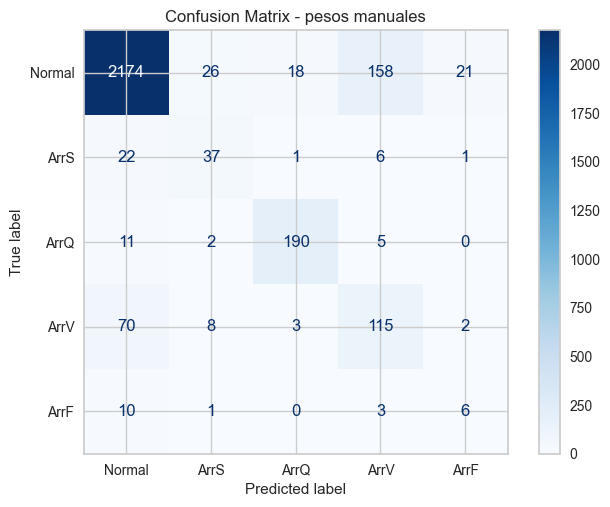

In [45]:
logreg_custom = LogisticRegression(penalty='l2', solver='lbfgs', class_weight=best_w, C=100, max_iter=3000, n_jobs=-1)
logreg_custom.fit(X_train, y_train_s)
y_pred_custom = logreg_custom.predict(X_test)

print("balanced_acc:", balanced_accuracy_score(y_test_s, y_pred_custom))
print("f1_macro   :", f1_score(y_test_s, y_pred_custom, average='macro'))
print("f1_weighted:", f1_score(y_test_s, y_pred_custom, average='weighted'))
print("\nClassification report (pesos manuales):\n")
print(classification_report(y_test_s, y_pred_custom, digits=3))

cm = confusion_matrix(y_test_s, y_pred_custom, labels=['Normal','ArrS','ArrQ','ArrV','ArrF'])
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','ArrS','ArrQ','ArrV','ArrF'])
disp.plot(cmap="Blues", values_format='d'); plt.title("Confusion Matrix - pesos manuales"); plt.show()

Podemos observar que frente al modelo anterior con la variable "balanced", los pesos manuales mantienen la idea de priorizar arritmias, pero de forma menos agresiva. Esto lo podemos ver porque hay una mejora clara del equilibrio general: f1_macro sube de 0.47 a 0.61 y la accuracy pasa de 0.69 a 0.87.

Además se recupera mucha precisión en las minoritarias como ArrS, ArrF y ArrV, mejorando tanto la precisión como el F1 de forma notaria.

También se puede ver como el recall ha bajado en las clases minoritarias. Esto se debe a que ya no se marcan tantas arritmias. En cambio en la Normal el recall ha subido bastante (de 067 a 0.91), por eso la Confusion Matrix muestra muchos menos normales mal clasificados como arritmia.